In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.shape

(230130, 6)

In [ ]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       98550 non-null  int64 
 1   date     98550 non-null  object
 2   country  98550 non-null  object
 3   store    98550 non-null  object
 4   product  98550 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [ ]:
train.describe()


,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [ ]:
test.describe()

,id
count,98550.000000
mean,279404.500000
std,28449.078852
min,230130.000000
25%,254767.250000
50%,279404.500000
75%,304041.750000
max,328679.000000


In [ ]:
train.shape

(230130, 6)

In [ ]:
test.shape

(98550, 5)

In [ ]:
train.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [ ]:
test.head()

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode


In [ ]:
train.isnull().sum()

,0
id,0
date,0
country,0
store,0
product,0
num_sold,8871


In [ ]:
test.isnull().sum()

,0
id,0
date,0
country,0
store,0
product,0


In [ ]:
train['date'] = pd.to_datetime(train['date'], format="%Y-%m-%d", dayfirst=True)

train['year'] = train['date'].dt.year
train['quarter'] = train['date'].dt.quarter
train['month'] = train['date'].dt.month

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        230130 non-null  int64         
 1   date      230130 non-null  datetime64[ns]
 2   country   230130 non-null  object        
 3   store     230130 non-null  object        
 4   product   230130 non-null  object        
 5   num_sold  221259 non-null  float64       
 6   year      230130 non-null  int32         
 7   quarter   230130 non-null  int32         
 8   month     230130 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(3)
memory usage: 13.2+ MB


In [ ]:
train.head()

,id,date,country,store,product,num_sold,year,quarter,month
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN,2010,1,1
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,1
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,1
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,1
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,1


In [ ]:
train = train.drop(columns='date')

In [ ]:
test['date'] = pd.to_datetime(test['date'], format="%Y-%m-%d", dayfirst=True)

test['year'] = test['date'].dt.year
test['quarter'] = test['date'].dt.quarter
test['month'] = test['date'].dt.month

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       98550 non-null  int64         
 1   date     98550 non-null  datetime64[ns]
 2   country  98550 non-null  object        
 3   store    98550 non-null  object        
 4   product  98550 non-null  object        
 5   year     98550 non-null  int32         
 6   quarter  98550 non-null  int32         
 7   month    98550 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(1), object(3)
memory usage: 4.9+ MB


In [ ]:
test.head()

,id,date,country,store,product,year,quarter,month
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose,2017,1,1
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle,2017,1,1
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers,2017,1,1
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler,2017,1,1
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode,2017,1,1


In [ ]:
test = test.drop(columns='date')

In [ ]:
train_id = train['id']
train = train.drop(columns='id')
test_id = test['id']
test = test.drop(columns='id')

# Visualizing

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
train.nunique()

,0
country,6
store,3
product,5
num_sold,4037
year,7
quarter,4
month,12


In [ ]:
test.nunique()

,0
country,6
store,3
product,5
year,3
quarter,4
month,12


In [ ]:
numeric_columns_train = train.select_dtypes(include=['number'])
categorical_columns_train = train.select_dtypes(include=['object'])

numeric_columns_test = test.select_dtypes(include=['number'])
categorical_columns_test = test.select_dtypes(include=['object'])

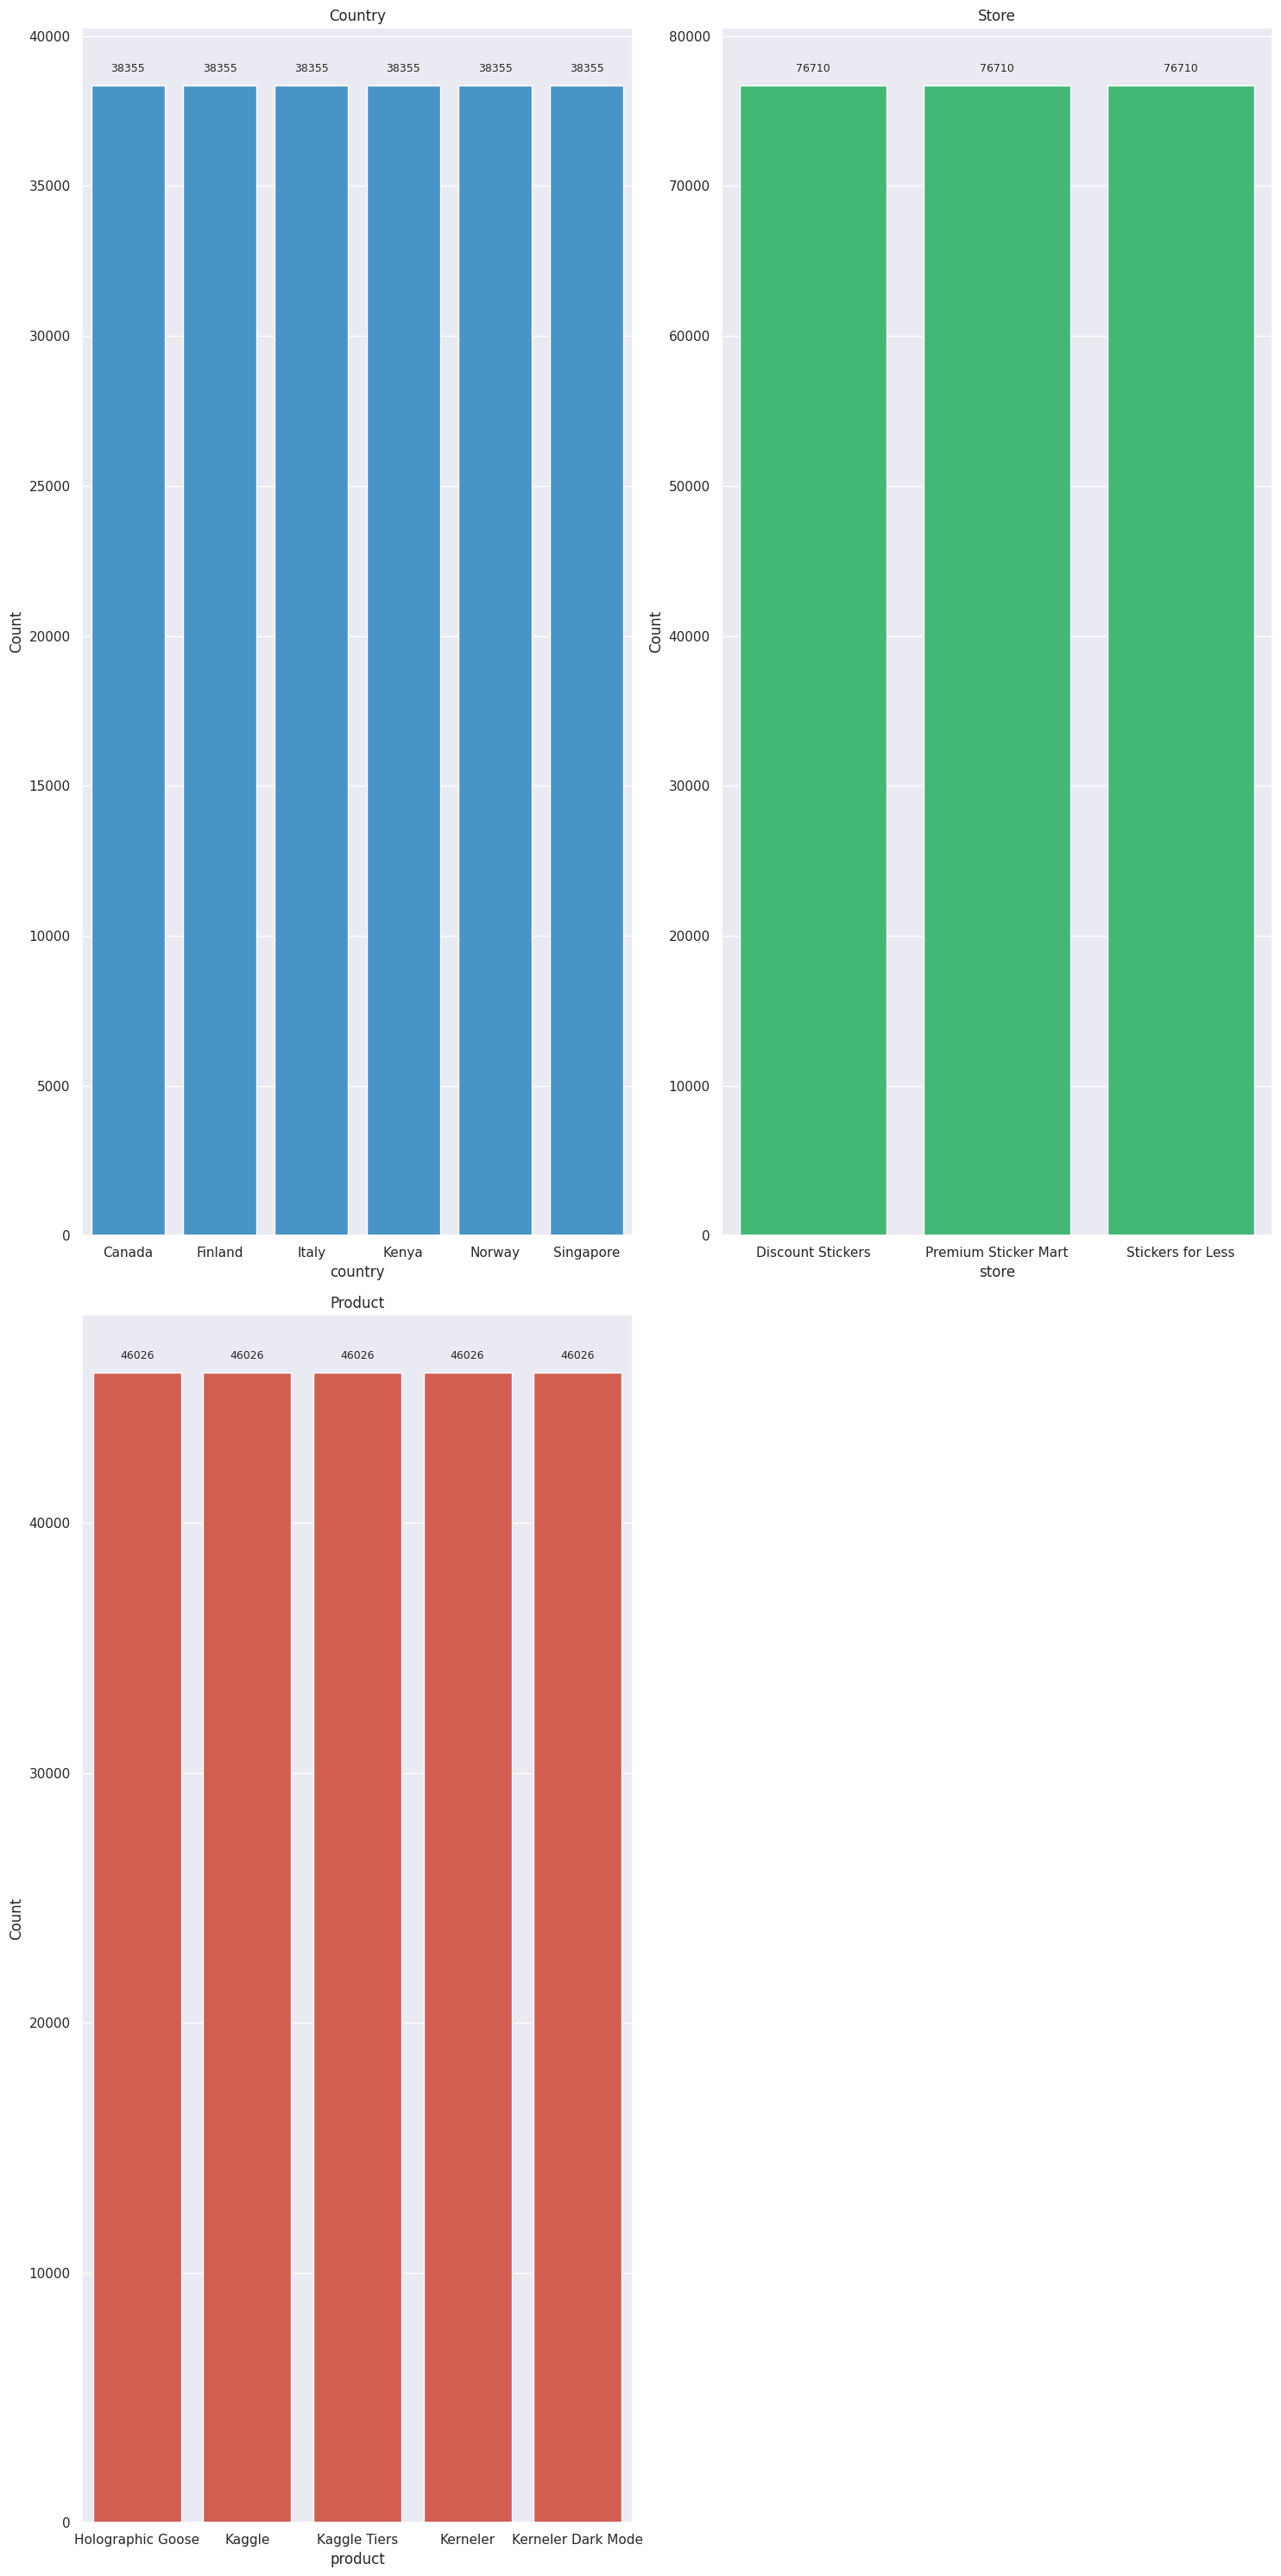

In [ ]:
# Set figure size for better readability
plt.figure(figsize=(15, 30))

# List of colors for the plots
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12', '#1abc9c', '#e67e22', '#8e44ad']

# Plot each categorical column
for i, column in enumerate(categorical_columns_train.columns):
    counts = train[column].value_counts().sort_index()
    plt.subplot((len(categorical_columns_train.columns) + 1) // 2, 2, i + 1)
    sns.barplot(x=counts.index, y=counts.values, color=colors[i % len(colors)])
    plt.title(column.replace('_', ' ').title())
    plt.xlabel(column)
    plt.ylabel('Count')
    # Annotate counts above each bar
    for j, count in enumerate(counts):
        plt.text(j, count + (max(counts) * 0.01), str(count), ha='center', va='bottom', fontsize=9)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

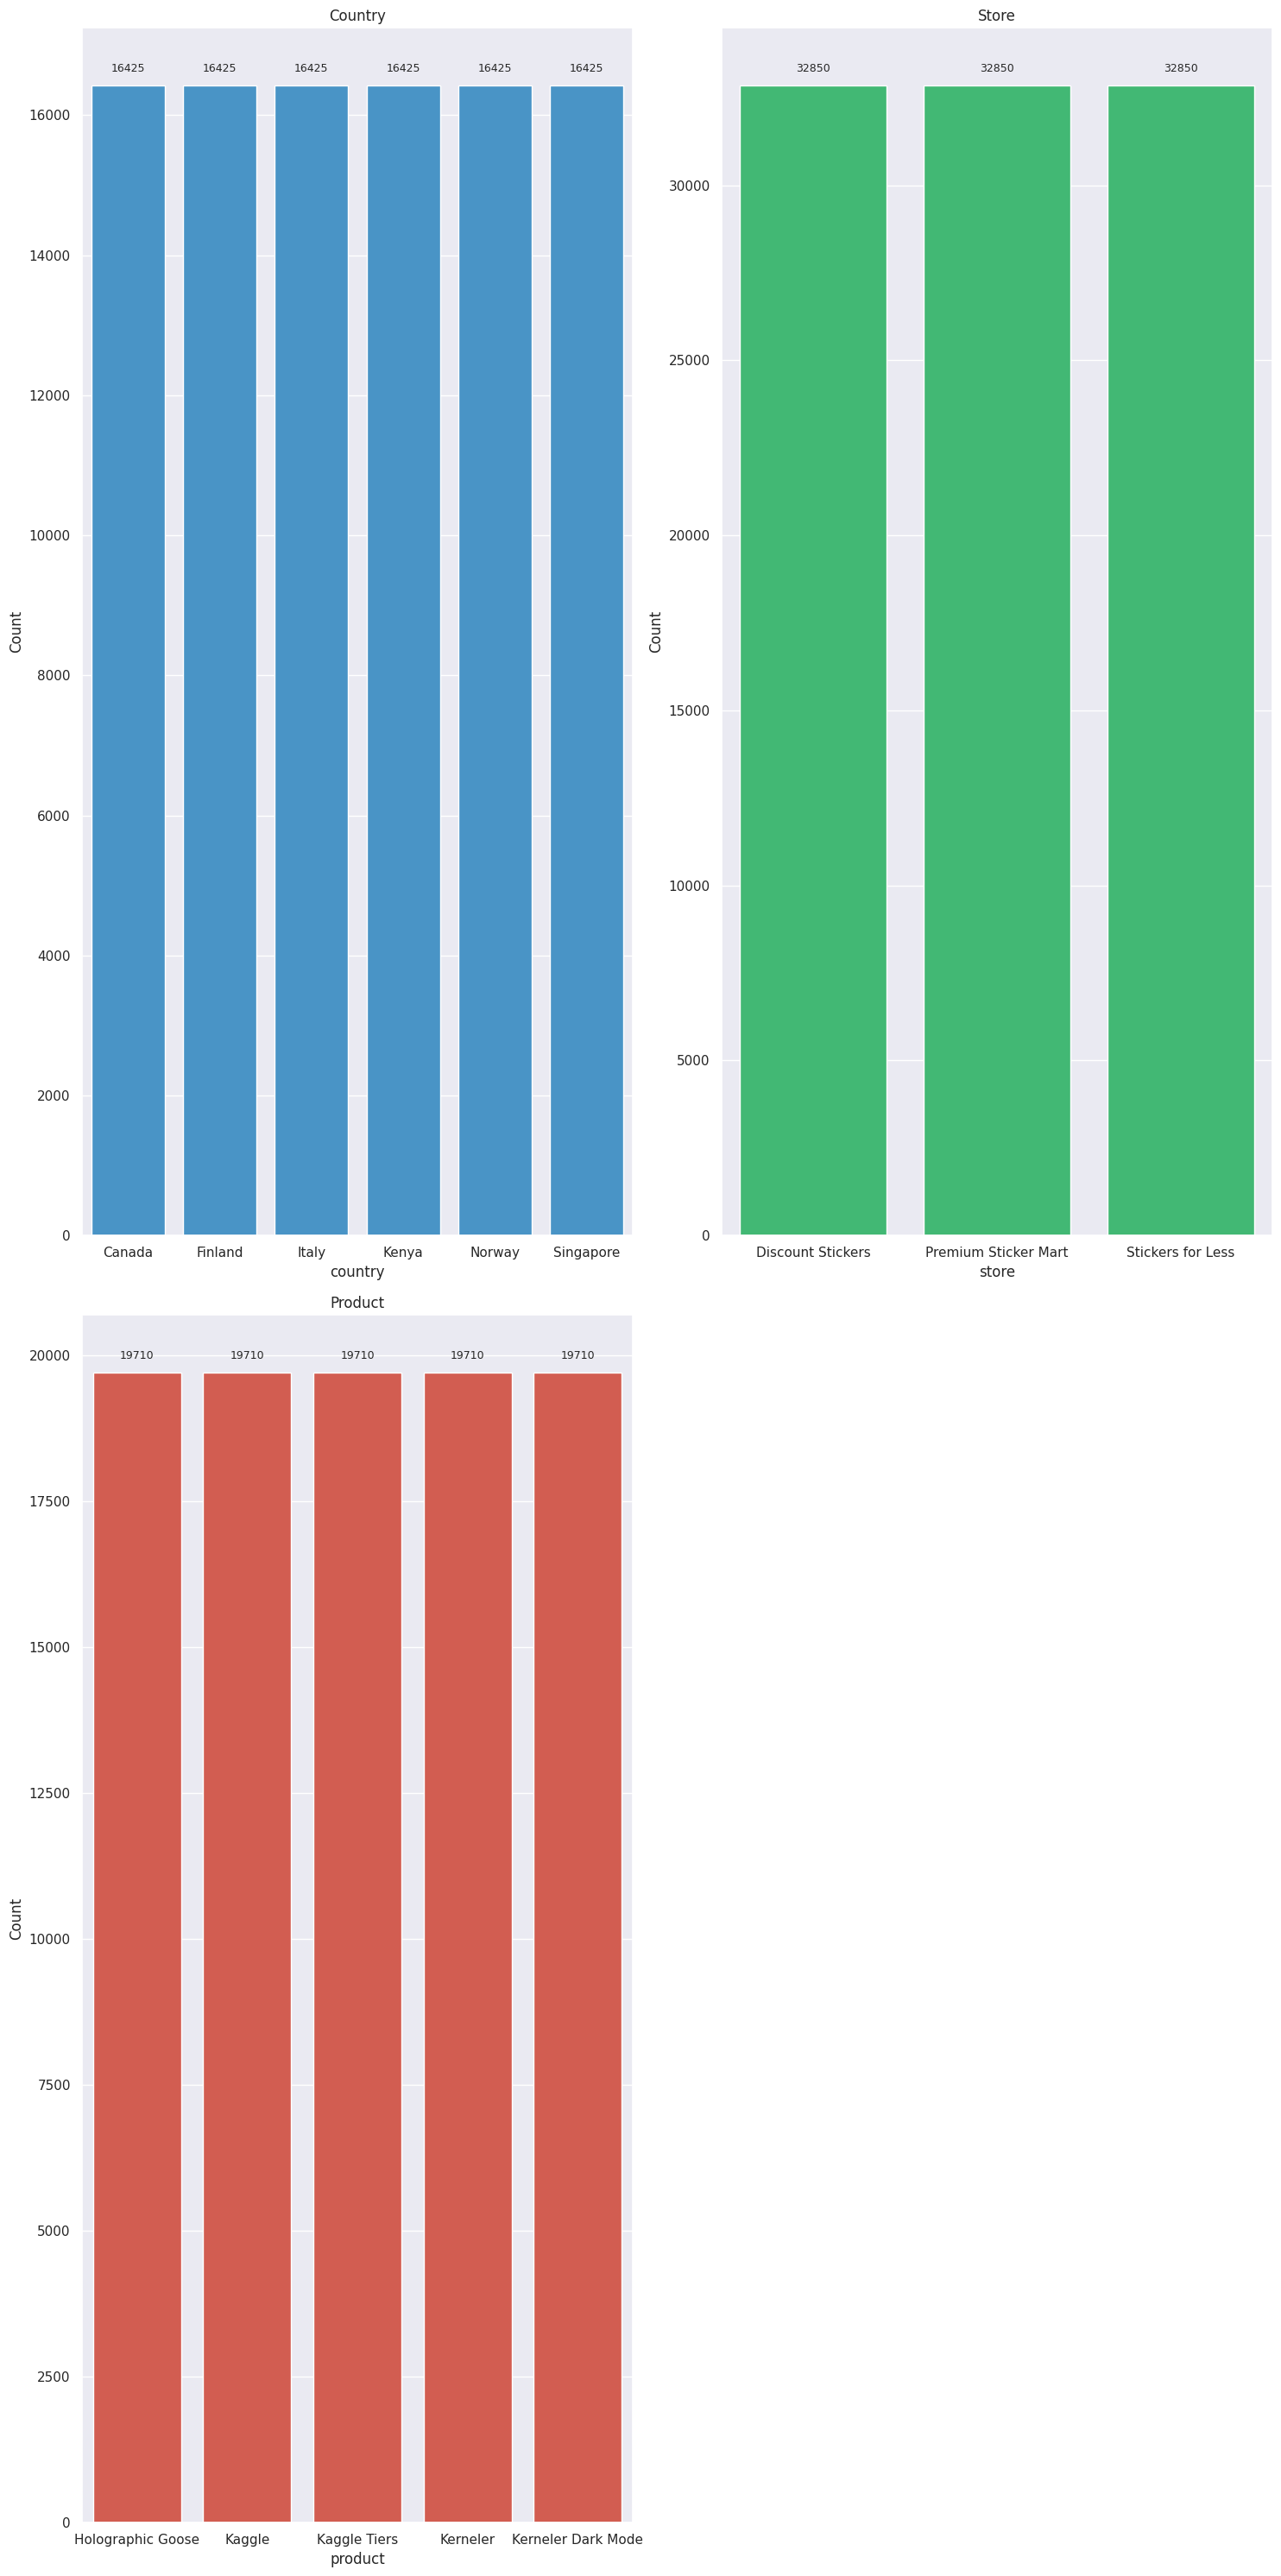

In [ ]:
# Set figure size for better readability
plt.figure(figsize=(15, 30))

# List of colors for the plots
colors = ['#3498db', '#2ecc71', '#e74c3c', '#9b59b6', '#f39c12', '#1abc9c', '#e67e22', '#8e44ad']

# Plot each categorical column
for i, column in enumerate(categorical_columns_test.columns):
    counts = test[column].value_counts().sort_index()
    plt.subplot((len(categorical_columns_test.columns) + 1) // 2, 2, i + 1)
    sns.barplot(x=counts.index, y=counts.values, color=colors[i % len(colors)])
    plt.title(column.replace('_', ' ').title())
    plt.xlabel(column)
    plt.ylabel('Count')
    # Annotate counts above each bar
    for j, count in enumerate(counts):
        plt.text(j, count + (max(counts) * 0.01), str(count), ha='center', va='bottom', fontsize=9)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

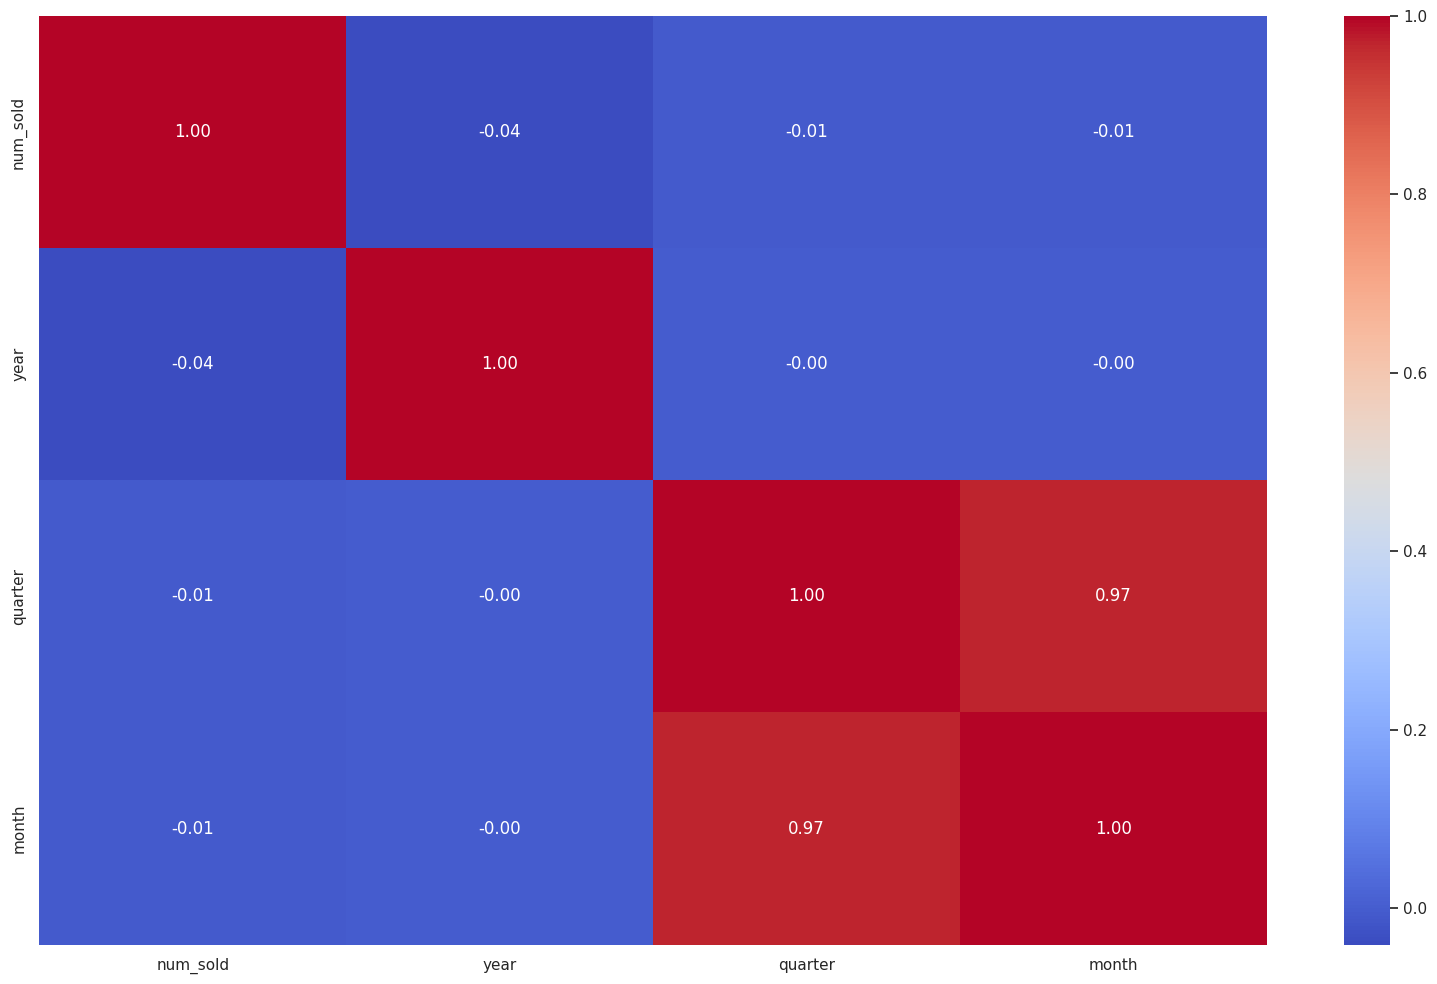

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_columns_train.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

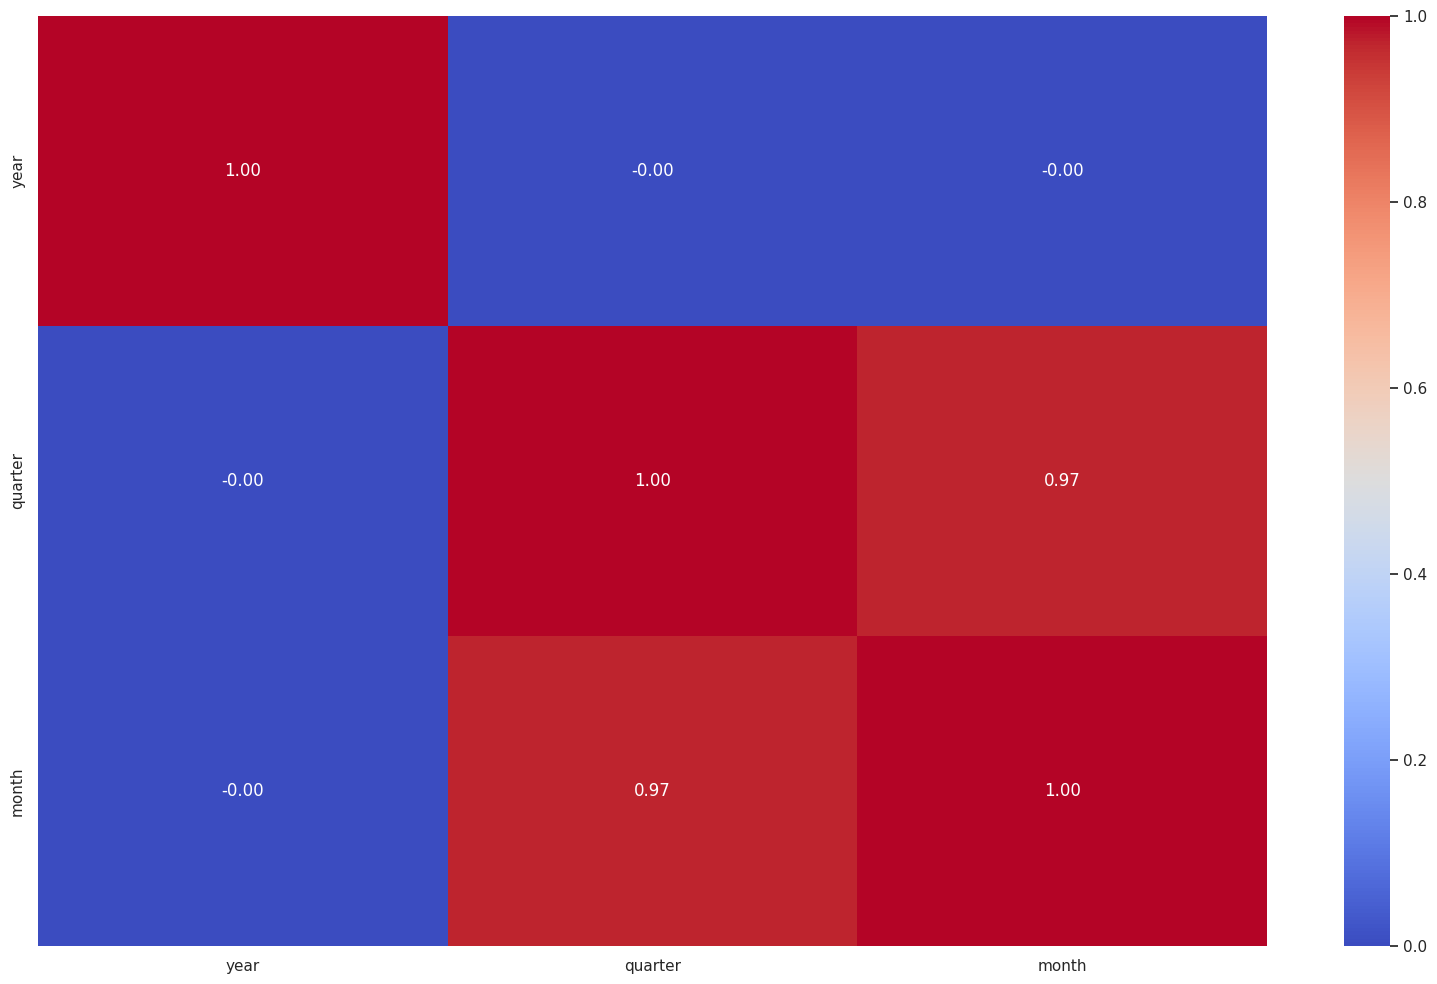

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_columns_test.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [ ]:
train = train.drop(columns= 'year')
test = test.drop(columns='year')

In [ ]:
train.head()

,country,store,product,num_sold,quarter,month
0,Canada,Discount Stickers,Holographic Goose,NaN,1,1
1,Canada,Discount Stickers,Kaggle,973.0,1,1
2,Canada,Discount Stickers,Kaggle Tiers,906.0,1,1
3,Canada,Discount Stickers,Kerneler,423.0,1,1
4,Canada,Discount Stickers,Kerneler Dark Mode,491.0,1,1


In [ ]:
test.head()

,country,store,product,quarter,month
0,Canada,Discount Stickers,Holographic Goose,1,1
1,Canada,Discount Stickers,Kaggle,1,1
2,Canada,Discount Stickers,Kaggle Tiers,1,1
3,Canada,Discount Stickers,Kerneler,1,1
4,Canada,Discount Stickers,Kerneler Dark Mode,1,1


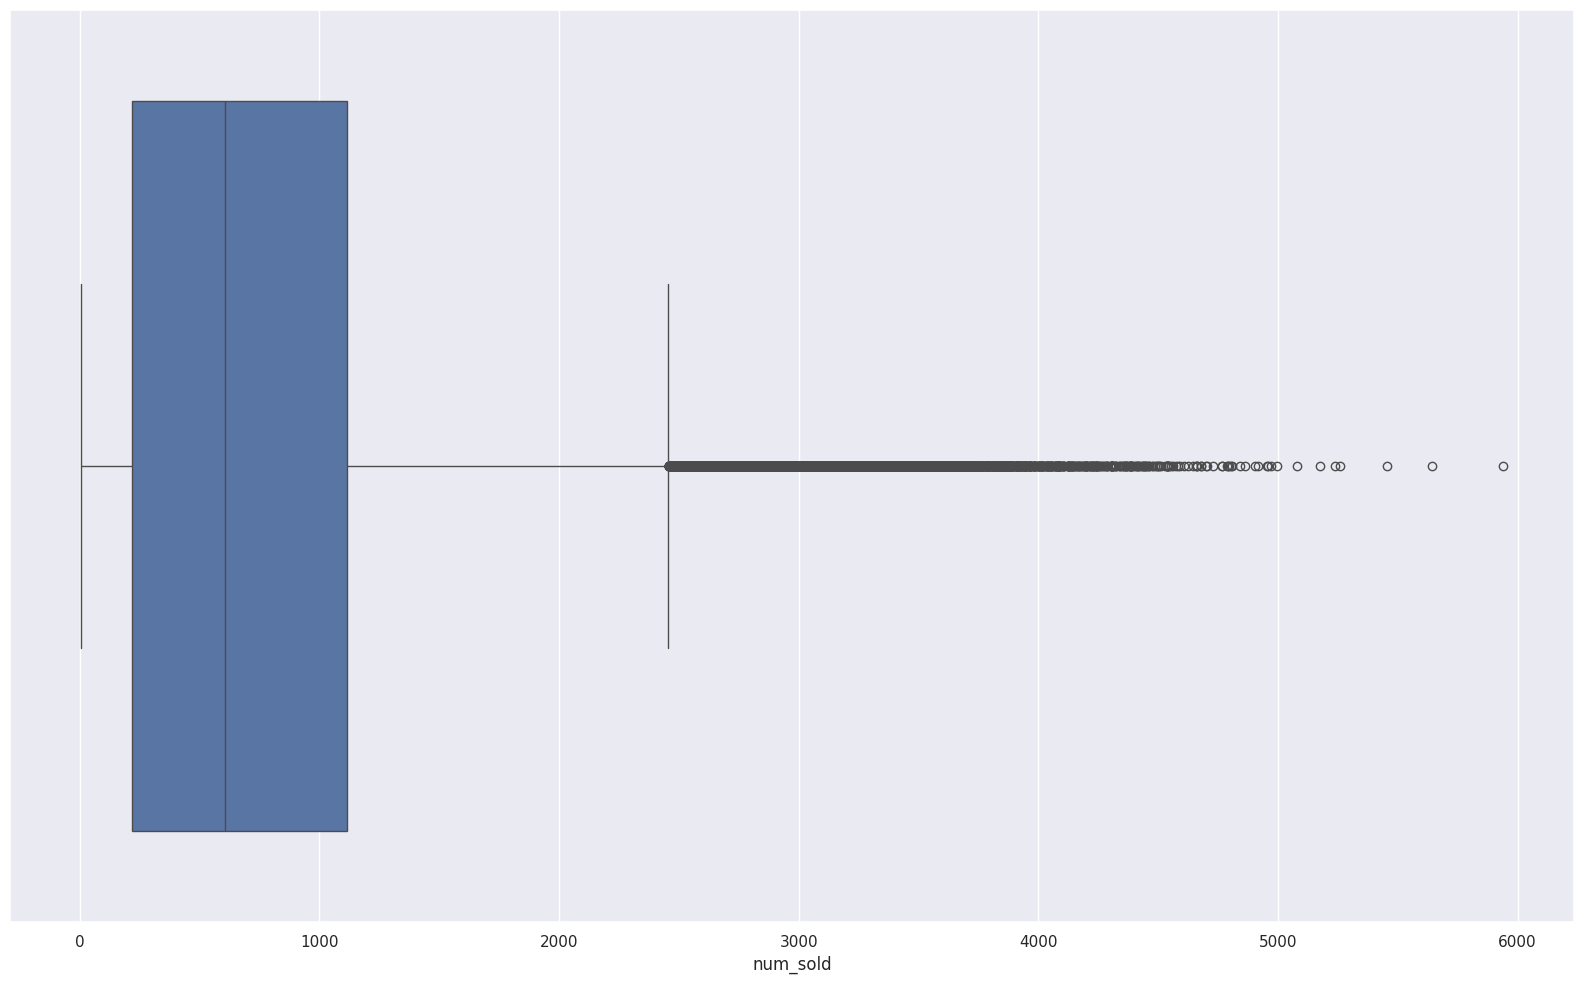

In [ ]:
# Select numeric columns only

# Set figure size for better readability
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
sns.boxplot(data=train, x='num_sold')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

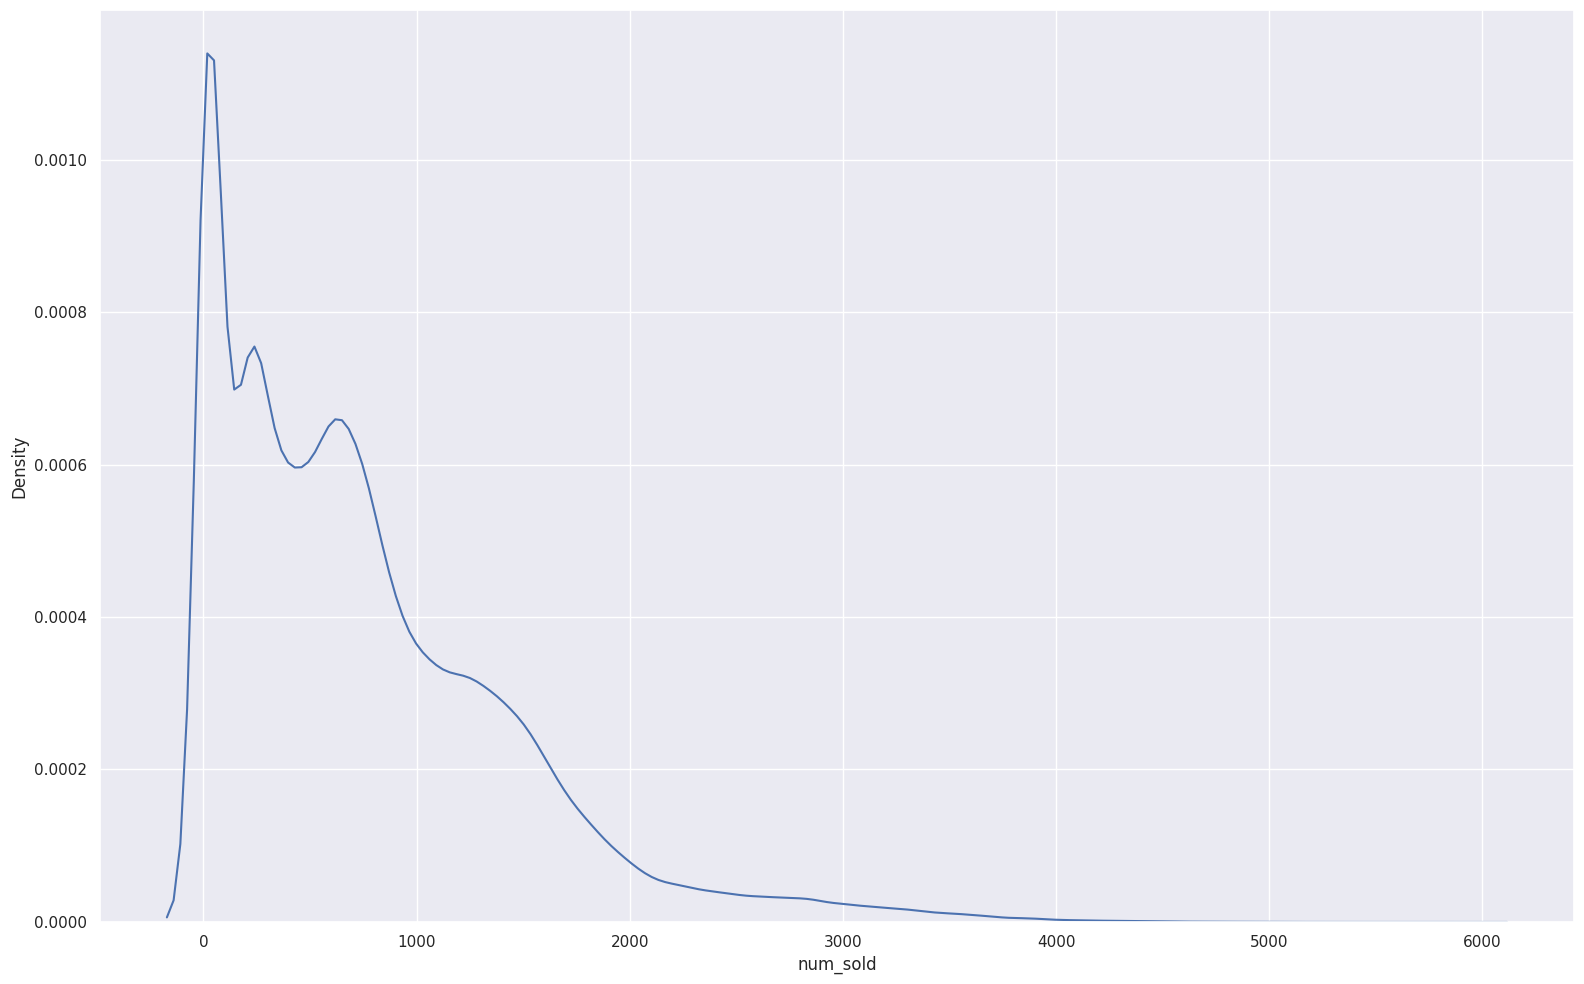

In [ ]:
# Select numeric columns only

# Set figure size for better readability
plt.figure(figsize=(16, 10))

# Iterate through each numeric column and create boxplot
sns.kdeplot(data=train, x='num_sold')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Imputation and Transforming


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer , StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
ft = FunctionTransformer(func=np.log1p)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(drop='first',sparse_output=False)

In [ ]:
num_sold_pipeline = Pipeline([
    ('imputer', KNNImputer()),  # Impute missing values first
    ('scaler', StandardScaler())  # Then scale the data
])

In [ ]:
num_sold_transformer = ColumnTransformer(transformers=[
    ('num_sold', num_sold_pipeline, ['num_sold']),  # Apply the pipeline to num_sold
    ('encode', OneHotEncoder(), ['country', 'store', 'product'])  # One-hot encoding for categorical features
], remainder='passthrough')

In [ ]:
train_transformed = num_sold_transformer.fit_transform(train)

In [ ]:
train_transformed = pd.DataFrame(train_transformed,columns = num_sold_transformer.get_feature_names_out())

In [ ]:
train_transformed

,num_sold__num_sold,encode__country_Canada,encode__country_Finland,encode__country_Italy,encode__country_Kenya,encode__country_Norway,encode__country_Singapore,encode__store_Discount Stickers,encode__store_Premium Sticker Mart,encode__store_Stickers for Less,encode__product_Holographic Goose,encode__product_Kaggle,encode__product_Kaggle Tiers,encode__product_Kerneler,encode__product_Kerneler Dark Mode,remainder__quarter,remainder__month
0,1.679941e-16,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,3.257906e-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,2.267853e-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,-4.869400e-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,-3.864569e-01,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,-4.233992e-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,12.0
230126,3.183647e+00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,12.0
230127,2.285210e+00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,12.0
230128,7.232898e-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,12.0


# Model Building

In [ ]:
x = train_transformed.drop(columns='num_sold__num_sold')
y = train_transformed['num_sold__num_sold']

In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=365)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score ,KFold
from sklearn.metrics import r2_score
from sklearn.ensemble import VotingRegressor


In [ ]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = DecisionTreeRegressor()
model4 = KNeighborsRegressor()

In [ ]:
ensemble_model = VotingRegressor(estimators=[
    ('lr', model1),
    ('gb', model2),
    ('dt', model3),
    ('knn', model4)
])

In [ ]:
# pipe = Pipeline([
#     ('preprocessor',num_sold_transformer),
#     ('ensemble_model',ensemble_model)
# ])

In [ ]:
ensemble_model.fit(x_train,y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('gb', GradientBoostingRegressor()),
                            ('dt', DecisionTreeRegressor()),
                            ('knn', KNeighborsRegressor())])

In [ ]:
y_pred = ensemble_model.predict(x_test)

In [ ]:
r2_score(y_test , y_pred)

0.9201248027936462

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(ensemble_model, x, y, cv=kfold, scoring='r2')


# Print cross-validation results
print("Cross-validation r2 scores:", scores)
print(f"Mean r2 score: {scores.mean():.4f}")
print(f"Standard deviation of r2 scores: {scores.std():.4f}")

Cross-validation r2 scores: [0.91830795 0.91798142 0.91684679 0.91582695 0.91809702]
Mean r2 score: 0.9174
Standard deviation of r2 scores: 0.0009


# Prepaing for Submission

In [ ]:
test

,country,store,product,quarter,month
0,Canada,Discount Stickers,Holographic Goose,1,1
1,Canada,Discount Stickers,Kaggle,1,1
2,Canada,Discount Stickers,Kaggle Tiers,1,1
3,Canada,Discount Stickers,Kerneler,1,1
4,Canada,Discount Stickers,Kerneler Dark Mode,1,1
...,...,...,...,...,...
98545,Singapore,Premium Sticker Mart,Holographic Goose,4,12
98546,Singapore,Premium Sticker Mart,Kaggle,4,12
98547,Singapore,Premium Sticker Mart,Kaggle Tiers,4,12
98548,Singapore,Premium Sticker Mart,Kerneler,4,12


In [ ]:
transformer = ColumnTransformer(transformers=[
    ('encode', OneHotEncoder(), ['country', 'store', 'product'])  # One-hot encoding for categorical features
], remainder='passthrough')

In [ ]:
test_transformed = transformer.fit_transform(test)

In [ ]:
test_transformed = pd.DataFrame(test_transformed,columns = transformer.get_feature_names_out())

In [ ]:
test_transformed

,encode__country_Canada,encode__country_Finland,encode__country_Italy,encode__country_Kenya,encode__country_Norway,encode__country_Singapore,encode__store_Discount Stickers,encode__store_Premium Sticker Mart,encode__store_Stickers for Less,encode__product_Holographic Goose,encode__product_Kaggle,encode__product_Kaggle Tiers,encode__product_Kerneler,encode__product_Kerneler Dark Mode,remainder__quarter,remainder__month
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98545,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,12.0
98546,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,12.0
98547,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,12.0
98548,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,12.0


In [ ]:
ensemble_model.fit(x_train,y_train)
predictions = ensemble_model.predict(test_transformed)  # Use predict() method instead of calling the model

# Assuming 'id' is defined; you need to ensure it has the same length as predictions
output = pd.DataFrame({'id': test_id , 'num_sold': predictions})

# Save the output to a CSV file
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
